# Data exploration train.csv

In [77]:
# Load data
import pandas as pd
train_data = pd.read_csv("data/train.csv")

/home/sabine/miniconda3/envs/minicomp/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [78]:
# explore data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637774 entries, 0 to 637773
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           637774 non-null  object 
 1   Store          618473 non-null  float64
 2   DayOfWeek      618757 non-null  float64
 3   Sales          618747 non-null  float64
 4   Customers      618683 non-null  float64
 5   Open           618588 non-null  float64
 6   Promo          618580 non-null  float64
 7   StateHoliday   618520 non-null  object 
 8   SchoolHoliday  618437 non-null  float64
dtypes: float64(7), object(2)
memory usage: 43.8+ MB


In [79]:
train_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,618473.000000,618757.000000,618747.000000,618683.000000,618588.000000,618580.000000,618437.000000
mean,558.105623,3.994914,5668.015834,628.909831,0.829167,0.370447,0.173253
std,321.885545,1.997485,3809.655137,463.786905,0.376363,0.482925,0.378466
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.000000,2.000000,3640.000000,397.000000,1.000000,0.000000,0.000000
50%,558.000000,4.000000,5625.000000,604.000000,1.000000,0.000000,0.000000
75%,837.000000,6.000000,7714.000000,833.000000,1.000000,1.000000,0.000000
max,1115.000000,7.000000,38037.000000,7388.000000,1.000000,1.000000,1.000000


In [80]:
# show example data 
train_data.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0


array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>],
       [<AxesSubplot:title={'center':'Customers'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>],
       [<AxesSubplot:title={'center':'SchoolHoliday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

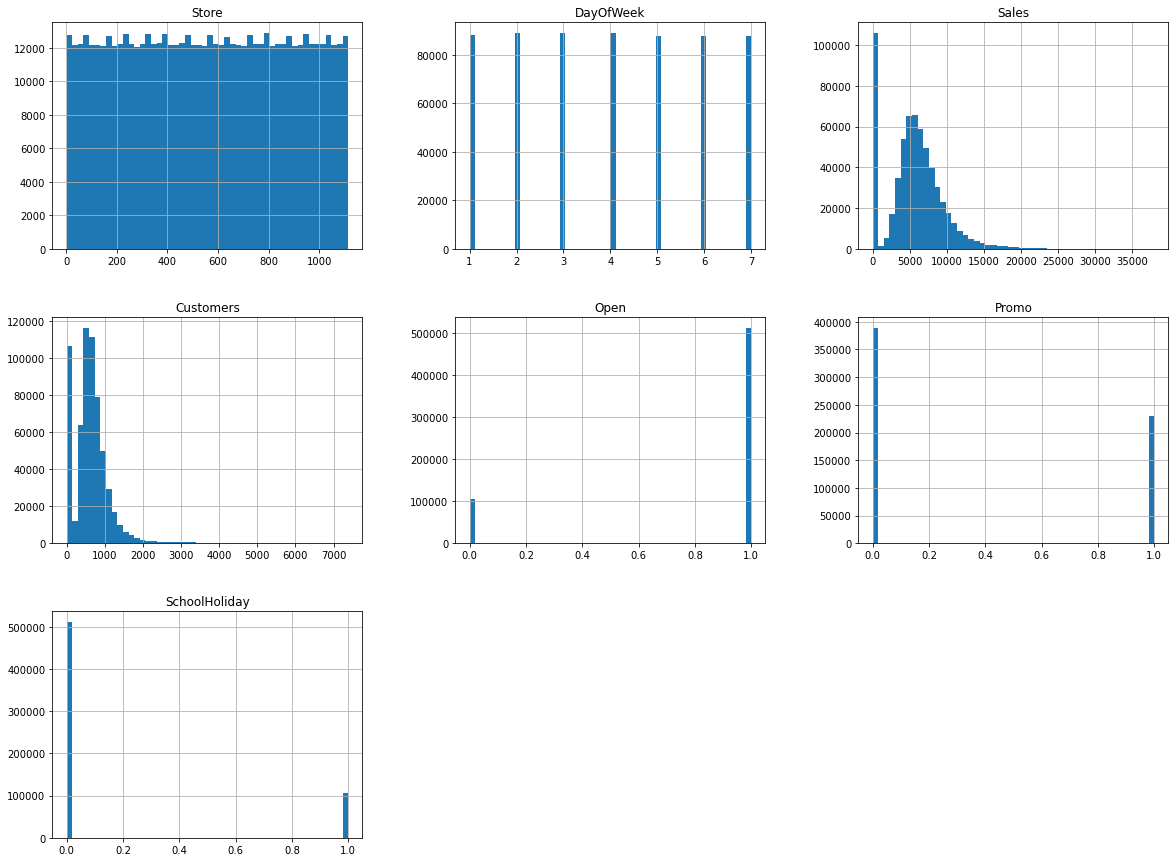

In [81]:
# show histograms
%matplotlib inline 
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))

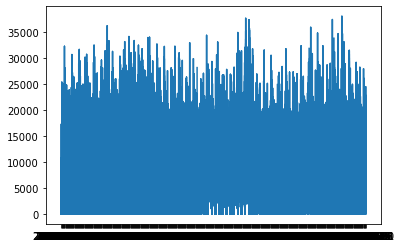

In [82]:
# plot Sales over Date
plt.plot(train_data['Date'], train_data['Sales'])

# Data Preprocessing 1

In [83]:
# drop column "Customers" as it won't be in the test dataset
# and rows with zero sales
train_data.drop(columns = "Customers", inplace=True)
train_data = train_data[train_data['Sales'] > 0]

In [84]:
# categorical variable state holiday
# what are the possible values
train_data['StateHoliday'].value_counts()

0      444136
0.0     52717
a         415
b          93
c          35
Name: StateHoliday, dtype: int64

In [85]:
# 0 and 0.0 are the same = no holiday
# renaming categories to be intuitive
train_data['StateHoliday'] = train_data['StateHoliday'].replace(0.0, "0")
train_data['StateHoliday'] = train_data['StateHoliday'].replace("0", "No")
train_data['StateHoliday'] = train_data['StateHoliday'].replace("a", "Public")
train_data['StateHoliday'] = train_data['StateHoliday'].replace("b", "Easter")
train_data['StateHoliday'] = train_data['StateHoliday'].replace("c", "Christmas")
train_data['StateHoliday'].value_counts()

No           496853
Public          415
Easter           93
Christmas        35
Name: StateHoliday, dtype: int64

# Generate validation set

In [91]:
# Split train and validation set at 2014-04-30
validation_set = train_data[train_data['Date'] > '2014-04-30']
newtrain_set = train_data[train_data['Date'] <= '2014-04-30']

print(f"New train set length: {len(newtrain_set)}")
print(f"New validation set length: {len(validation_set)}")

validation_set.to_csv("data/validation.csv", header=True)
newtrain_set.to_csv("data/newtrain.csv", header=True)

New train set length: 435837
New validation set length: 77119


In [87]:
validation_set.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday
540801,2014-05-01,353.0,4.0,9336.0,NaN,1.0,Public,0.0
540889,2014-05-01,335.0,4.0,10770.0,1.0,1.0,Public,0.0
540921,2014-05-01,512.0,4.0,7793.0,1.0,1.0,Public,0.0
540934,2014-05-01,494.0,4.0,9561.0,1.0,1.0,Public,0.0
541003,2014-05-01,423.0,4.0,15078.0,1.0,NaN,Public,0.0


# Baseline model

In [88]:
# define evaluation metrics
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [89]:
import numpy as np
# get baseline prediction evaluation taking the average of new training set as prediction
mean = newtrain_set['Sales'].mean()
preds = np.full(len(validation_set), mean)
rmspe = metric(preds, np.array(validation_set['Sales']))

print(f'Prediction: average, RMSPE={rmspe:.2f}%')


Prediction: average, RMSPE=55.18%


# Data preprocessing 2

In [92]:
# drop stores with id "nan"
newtrain_set = newtrain_set[newtrain_set['Store'] > 0]
# create new store category based on mean sales

means = newtrain_set.groupby(['Store']).mean()['Sales']
mapping = {}

# create new store category based on mean sales
limits = [5000, 7500, 10000]
new_cat = ["l", "m", "h", "vh"]
for i, m in enumerate(means):
    mapping[means.index[i]] = new_cat[0]
    for j, l in enumerate(limits):
        if m > l:
            mapping[means.index[i]] = new_cat[j+1]
            
newtrain_set['Store_cat'] = "l"

def map_store_category(data, mapping):
    for store, cat in mapping.items():
        data.loc[data['Store'] == store, 'Store_cat'] = cat
    
map_store_category(newtrain_set, mapping)    
newtrain_set.head()


,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Store_cat
27,2013-01-01,353.0,2.0,3139.0,1.0,0.0,Public,1.0,l
115,2013-01-01,335.0,2.0,2401.0,1.0,0.0,Public,1.0,vh
147,2013-01-01,512.0,2.0,2646.0,1.0,0.0,Public,1.0,m
162,2013-01-01,494.0,2.0,3113.0,1.0,0.0,Public,1.0,h
199,2013-01-01,530.0,2.0,2907.0,1.0,0.0,Public,1.0,l


# Check for stationarity

In [93]:
from statsmodels.tsa.stattools import adfuller
pvalues = []
store_ids = newtrain_set['Store'].unique()
for id in store_ids:
    result = adfuller(newtrain_set.loc[newtrain_set['Store'] == id, 'Sales'])
 #   print('ADF Statistic: %f' % result[0])
    pvalues.append(result[1])
 #   print('Critical Values:')
 #   for key, value in result[4].items():
 #       print('\t%s: %.3f' % (key, value))


df_pvalues = pd.DataFrame({
        "Store" : store_ids,
        "pvalue" : pvalues,
})
print(df_pvalues)     

       Store    pvalue
0      353.0  0.132250
1      335.0  0.000510
2      512.0  0.010869
3      494.0  0.000005
4      530.0  0.163397
...      ...       ...
1110   804.0  0.001282
1111   762.0  0.000005
1112   349.0  0.045862
1113   103.0  0.021975
1114  1081.0  0.020304

[1115 rows x 2 columns]


In [94]:
# Plotly Express is now a sublibrary of Plotly:
import plotly.express as px
fig = px.scatter(
    data_frame=df_pvalues,
    x='Store',
    y='pvalue',
    title='P values per store',
    log_y = True
)
fig.add_hline(y=0.05)
fig.show()
# black line is p-value threshold for stationarity 0.05
# most stores are stationary!

# Merge train and store

In [103]:
store = pd.read_csv('data/store.csv')
newtrain = newtrain_set
# merge store and sales

merge_data = pd.merge(newtrain, store, how='left', on='Store')

In [104]:
merge_data.head()

,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Store_cat,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,353.0,2.0,3139.0,1.0,0.0,Public,1.0,l,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov"
1,2013-01-01,335.0,2.0,2401.0,1.0,0.0,Public,1.0,vh,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
2,2013-01-01,512.0,2.0,2646.0,1.0,0.0,Public,1.0,m,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec"
3,2013-01-01,494.0,2.0,3113.0,1.0,0.0,Public,1.0,h,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN
4,2013-01-01,530.0,2.0,2907.0,1.0,0.0,Public,1.0,l,a,c,18160.0,NaN,NaN,0,NaN,NaN,NaN


# Stationary model

In [106]:
def add_time_features(df):
    print(df.Date)
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    return df  
merge_data['Date'] = pd.to_datetime(merge_data['Date'], errors='coerce')
merge_data = add_time_features(merge_data)
merge_data.head()

0        2013-01-01
1        2013-01-01
2        2013-01-01
3        2013-01-01
4        2013-01-01
            ...    
422586   2014-04-30
422587   2014-04-30
422588   2014-04-30
422589   2014-04-30
422590   2014-04-30
Name: Date, Length: 422591, dtype: datetime64[ns]


,Date,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,Store_cat,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month
0,2013-01-01,353.0,2.0,3139.0,1.0,0.0,Public,1.0,l,b,b,900.0,NaN,NaN,1,14.0,2013.0,"Feb,May,Aug,Nov",2013,1
1,2013-01-01,335.0,2.0,2401.0,1.0,0.0,Public,1.0,vh,b,a,90.0,NaN,NaN,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1
2,2013-01-01,512.0,2.0,2646.0,1.0,0.0,Public,1.0,m,b,b,590.0,NaN,NaN,1,5.0,2013.0,"Mar,Jun,Sept,Dec",2013,1
3,2013-01-01,494.0,2.0,3113.0,1.0,0.0,Public,1.0,h,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN,2013,1
4,2013-01-01,530.0,2.0,2907.0,1.0,0.0,Public,1.0,l,a,c,18160.0,NaN,NaN,0,NaN,NaN,NaN,2013,1


In [ ]:
one_hot_cats = ['StateHoliday', 'Store_cat', 'StoreType', 'Assortment', 'Week']